In [98]:
import pickle
import numpy as np

#files = ['accuracy.dat','accuracy_new300.dat','accuracy_new300_2.dat','accuracy_new300_3.dat','accuracy_new300_3_stratified.dat']
files = ['accuracy_new300_2.dat','accuracy_new300_3.dat','accuracy_new100_3_depth6.dat']

with open('top10.dat') as f:
    state_top10 = pickle.load(f)
f.close()

auc_mean = []
auc_ci = []
for (i,file) in enumerate(files):
    with open(file) as f:
        aucs, confs, labels = pickle.load(f)
    f.close()
    auc_top10 = list(np.array([]) for ii in range(len(state_top10)))
    conf_top10 = list([np.array([]) for iii in range(len(state_top10))] for ii in range(len(state_top10)))
    for (k,lab) in enumerate(labels):
        for (j,state) in enumerate(state_top10):
            if state in lab:
                ind = np.where(lab==state)[0]
                auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])
                for (j2,state2) in enumerate(state_top10):
                    if state2 in lab:
                        ind2 = np.where(lab==state2)[0]
                        conf_top10[j][j2] = np.append(conf_top10[j][j2], confs[k][ind,ind2])

    auc_mean.append(np.array([]))
    auc_ci.append(np.array([]))
    for (j, a) in enumerate(auc_top10):
        auc_mean[i] = np.append(auc_mean[i], np.nanmean(a))
        auc_ci[i] = np.append(auc_ci[i], 2*np.nanstd(a)/np.sqrt(208))
print state_top10

['"Nightlife Spot (Bar, Club)"' '"Spiritual (Church, Temple, Etc.)"'
 '"Outdoors & Recreation"'
 '"Arts & Entertainment (Theater, Music Venue, Etc.)"' '"Work"'
 '"Professional or Medical Office"' '"Another\'s Home"'
 '"Food (Restaurant, Cafe)"' '"Home"' '"Shop or Store"']


In [42]:
print conf_top10[3][3].size

95


[array([ 0.65853902,  0.68765503,  0.60461784,  0.66875387,  0.65445325,
        0.70635399,  0.6547455 ,  0.63546459,  0.86780375,  0.71943123]), array([ 0.66098   ,  0.69867972,  0.53806055,  0.66976907,  0.65292586,
        0.69599631,  0.64951966,  0.63418207,  0.86905918,  0.72324058]), array([ 0.64484227,  0.6705233 ,  0.60156605,  0.6192711 ,  0.65721797,
        0.70100512,  0.65683198,  0.63932345,  0.86888353,  0.72235864])]


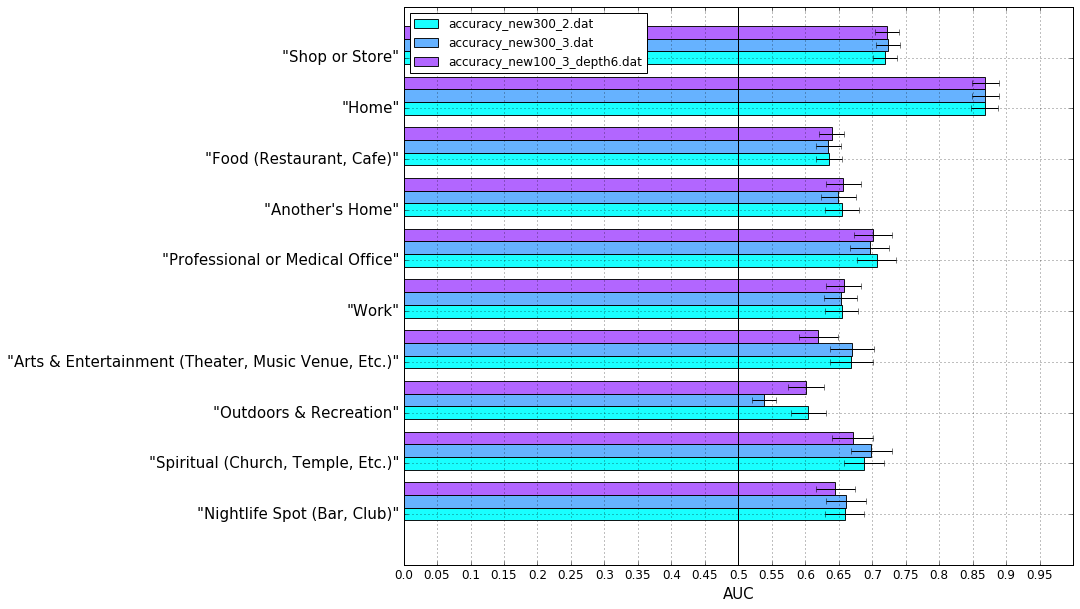

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
w = 1/(float(len(auc_mean))+1)
for (i, aucm) in enumerate(auc_mean):
    plt.barh(np.arange(i/(float(len(auc_mean)+1)),10+i/(1+float(len(auc_mean))),1), aucm, w, xerr=auc_ci[i], align='center', \
             color=(i/float(len(auc_mean)),1-i/float(len(auc_mean)),1), alpha=0.9, ecolor=(0,0,0))
plt.legend(files, loc=2)
plt.xlabel('AUC',fontsize=15,color=(0,0,0))
axes = plt.gca()
axes.set_ylim([-1, len(state_top10)])
axes.set_xlim([0, 1])
plt.yticks(range(len(state_top10)), state_top10, fontsize=15, color=(0,0,0));
plt.xticks(np.arange(0,1,.05), np.arange(0,1,.05), fontsize=12, color=(0,0,0));
plt.plot([.5, .5], [-1, len(state_top10)],color=(0,0,0))
plt.grid()
print auc_mean



In [65]:
def plot_confusion_matrix(cm, labels, title='Confusion matrix', cmap=plt.cm.Blues):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[  2.60000000e+01   1.00000000e+00   2.00000000e+00   7.00000000e+00
    1.80000000e+01   1.00000000e+00   2.40000000e+01   4.00000000e+01
    2.20000000e+01   5.90000000e+01]
 [  1.00000000e+00   1.30000000e+01   0.00000000e+00   9.00000000e+00
    2.40000000e+01   4.00000000e+00   1.80000000e+01   4.90000000e+01
    1.60000000e+01   7.10000000e+01]
 [  2.00000000e+00   0.00000000e+00   9.00000000e+00   4.00000000e+00
    4.40000000e+01   8.00000000e+00   9.00000000e+00   6.30000000e+01
    3.80000000e+01   1.75000000e+02]
 [  4.00000000e+00   1.00000000e+00   1.00000000e+00   1.30000000e+01
    2.60000000e+01   5.00000000e+00   2.30000000e+01   6.70000000e+01
    1.70000000e+01   1.23000000e+02]
 [  6.00000000e+00   4.00000000e+00   8.00000000e+00   6.00000000e+00
    1.73500000e+03   7.50000000e+01   1.76000000e+02   1.52000000e+02
    5.74000000e+02   4.51000000e+02]
 [  2.00000000e+00   1.00000000e+00   2.00000000e+00   1.00000000e+00
    1.25000000e+02   1.39000000e+02   1.40000

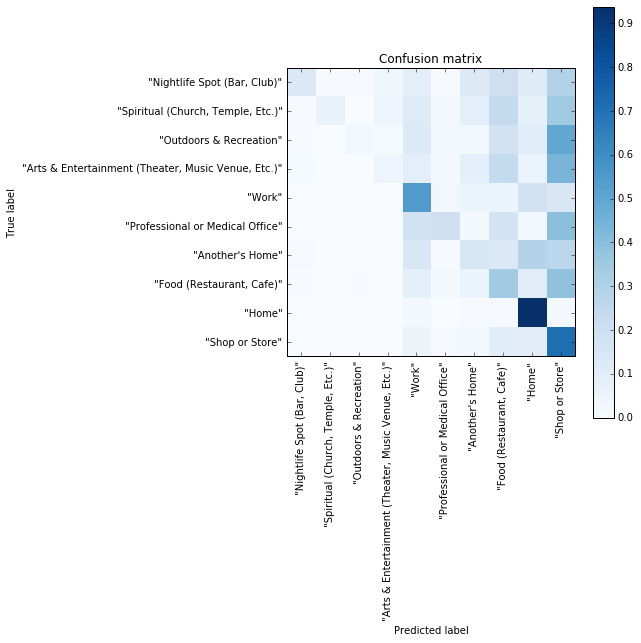

In [100]:
conf = np.zeros([10,10])
for (i,c_row) in enumerate(conf_top10):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10[i][j])
cm_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, state_top10)
print conf